### Machine Learning & Regressions
Sometimes, we think we've measured up well, while the dating partner proves we're wrong.<br>
How accurate is our perception from the partner's side?<br>
How their perception of us affect their willingness for future dates?<br>
Can we predict our partner's willingness based on our own perception of how we behaved?<br>
We will try to apply machine learning to tell the scenarios.

* [How accurate is our perception?](#cor-per)

In [102]:
import pandas as pd
pd.options.display.max_rows = 1000 #for showing truncated results
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error

In [103]:
# importing data
dates = pd.read_csv('./Dataset/Speed Dating Data.csv', encoding="ISO-8859-1") # we are using this encoding due to the format of the dataset. 
dates.head(5)
# include wanted columns
date = pd.concat([dates.iloc[:, 0],dates.iloc[:, 2],dates.iloc[:, 11:30],dates.iloc[:, 30:35],dates.iloc[:, 39:43],dates.iloc[:, 45:67],dates.iloc[:, 69:74],
                      dates.iloc[:, 92:97],dates.iloc[:, 97:102],dates.iloc[:, 104:107]], axis=1)
# deleting null rows
date = date.dropna()
# creating an object-free dataframe
date = date.drop(['field', 'from', 'career'], axis=1)

In [104]:
#participant's partner's final decision for future dates
partner_dec = date['dec_o'] 

# creating a dataframe with the partner's perception of the participant
partner_perception = date[['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o']] #attractive, sincere, intelligent, fun & ambitious

# creating a dataframe with participant's own feel of partner's perception
own_perception = date[['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']]

print(partner_dec.head(5))
print(partner_perception.head(5))
print(own_perception.head(5))

3409    0
3413    0
3414    1
3415    0
3418    1
Name: dec_o, dtype: int64
      attr_o  sinc_o  intel_o  fun_o  amb_o
3409     6.0     8.0      9.0    8.0    9.0
3413     5.0     7.0      8.0    6.0    7.0
3414     9.0     9.0      8.0    9.0    7.0
3415     5.0    10.0      6.0    7.0    7.0
3418     9.0     9.0      7.0    8.0    8.0
      attr5_1  sinc5_1  intel5_1  fun5_1  amb5_1
3409      9.0      6.0       9.0     6.0    10.0
3413      9.0      6.0       9.0     6.0    10.0
3414      9.0      6.0       9.0     6.0    10.0
3415      9.0      6.0       9.0     6.0    10.0
3418      6.0      9.0       9.0     9.0     9.0


### <a id="cor-per">How accurate is our perception?</a>
In this part, we will first find out how our accurate our feeling on our partner's perception is, using Linear Regressions.

Linear Regression between participant's and their partner's perception on his/her: attractive


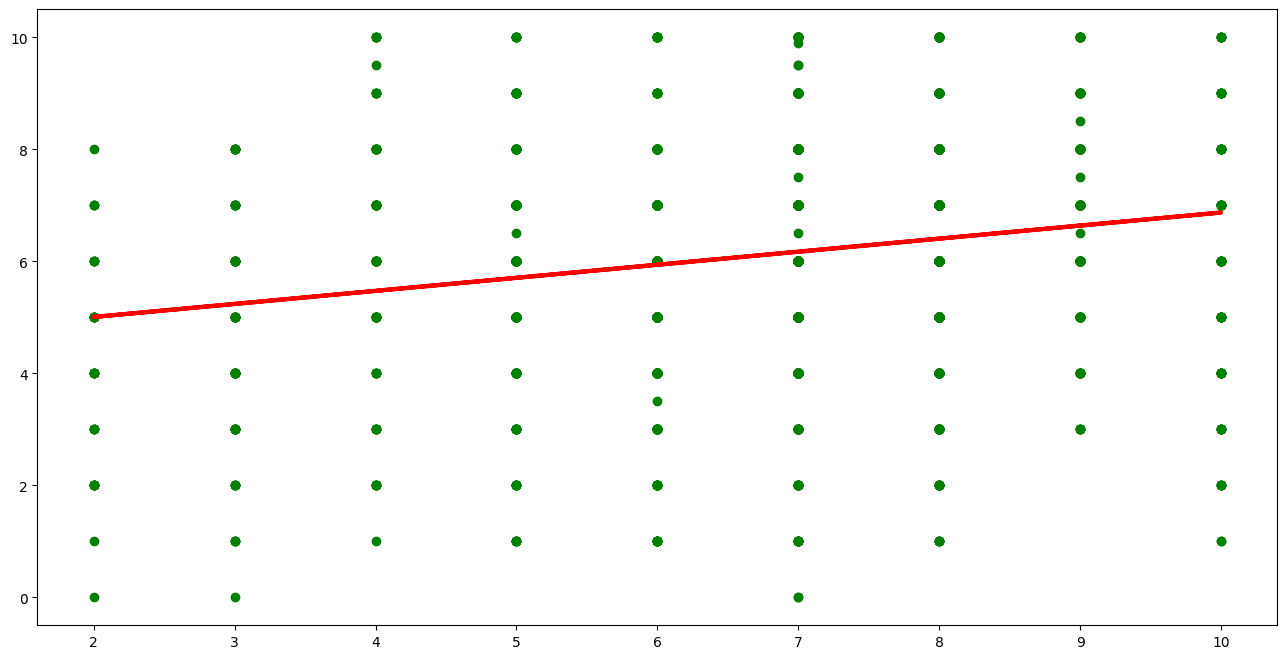

TRAIN SET:
Explained Variance (R^2) 	: 0.032373368655850054
Mean Squared Error (MSE) 	: 1.9402301952436882
Root Mean Squared Error （RMSE) 	: 1.3929214605438773
TEST SET:
Explained Variance (R^2) 	: 0.027153541216862975
Mean Squared Error (MSE) 	: 1.8910405322216302
Root Mean Squared Error （RMSE) 	: 1.3751510943244127
Linear Regression between participant's and their partner's perception on his/her: sincere


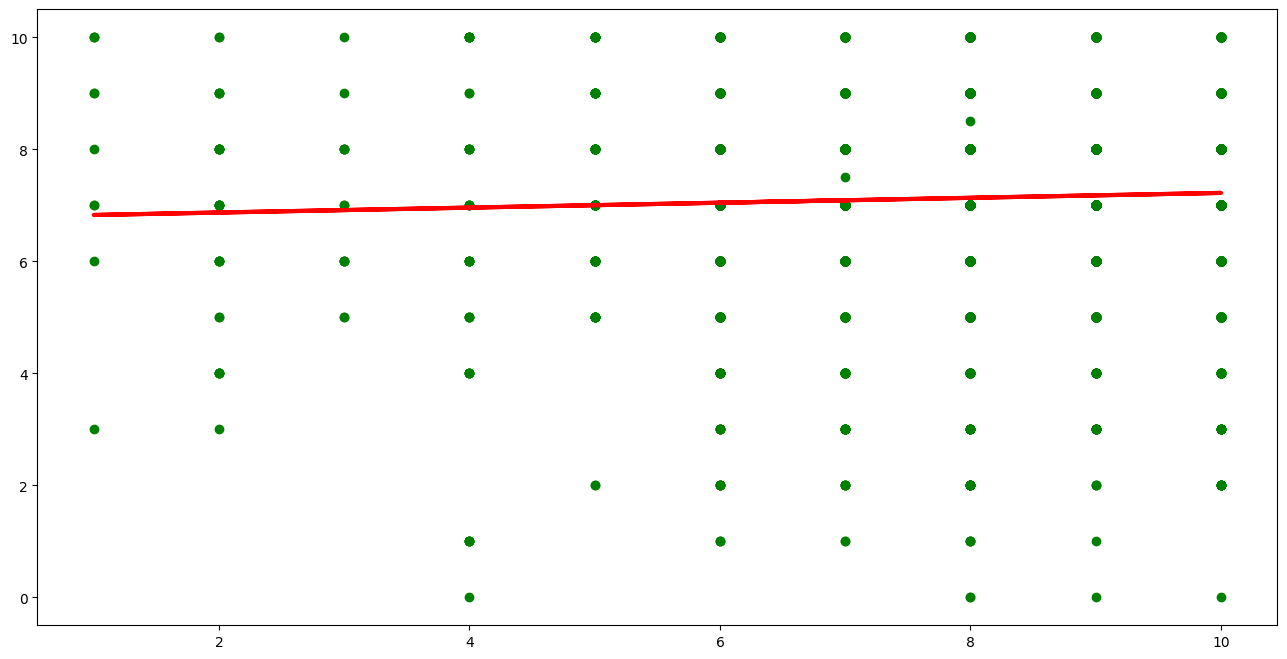

TRAIN SET:
Explained Variance (R^2) 	: 0.0016118295539958583
Mean Squared Error (MSE) 	: 3.112184179002711
Root Mean Squared Error （RMSE) 	: 1.7641383673064623
TEST SET:
Explained Variance (R^2) 	: -0.002362470536441341
Mean Squared Error (MSE) 	: 3.1631597904280206
Root Mean Squared Error （RMSE) 	: 1.7785274218937477
Linear Regression between participant's and their partner's perception on his/her: intelligence


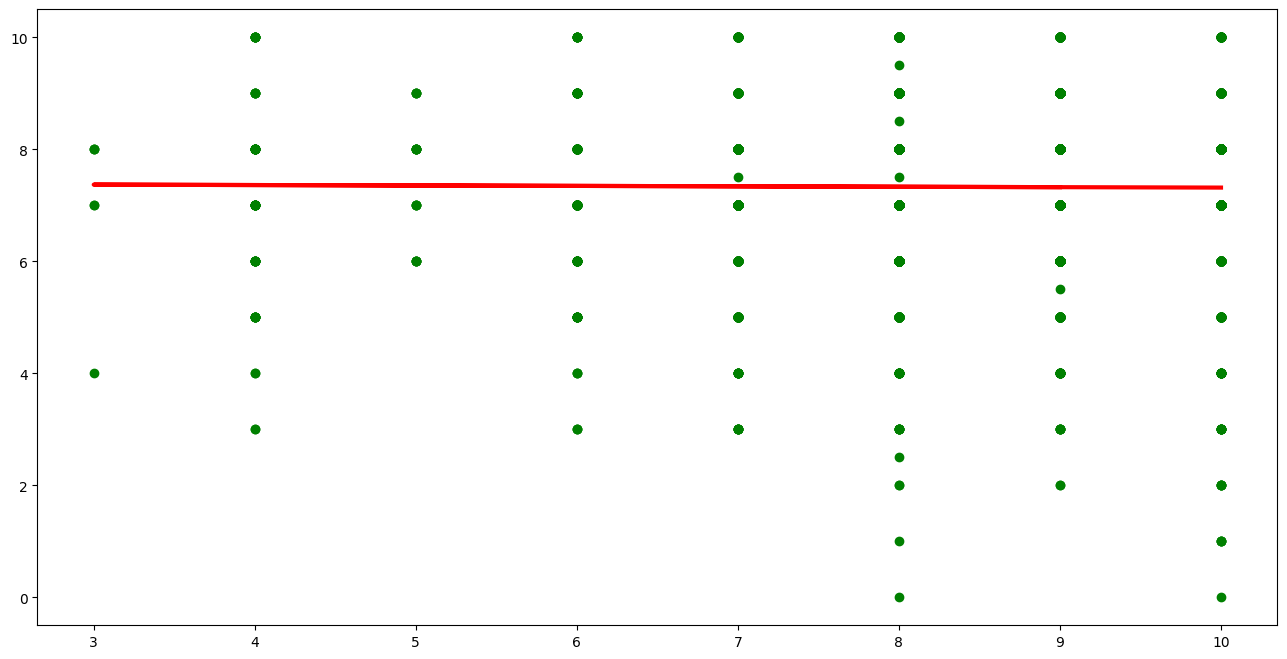

TRAIN SET:
Explained Variance (R^2) 	: 4.021780876861669e-05
Mean Squared Error (MSE) 	: 2.707642760378743
Root Mean Squared Error （RMSE) 	: 1.6454916470097145
TEST SET:
Explained Variance (R^2) 	: -0.0002961946331172527
Mean Squared Error (MSE) 	: 2.481007906421716
Root Mean Squared Error （RMSE) 	: 1.5751215529036848
Linear Regression between participant's and their partner's perception on his/her: fun


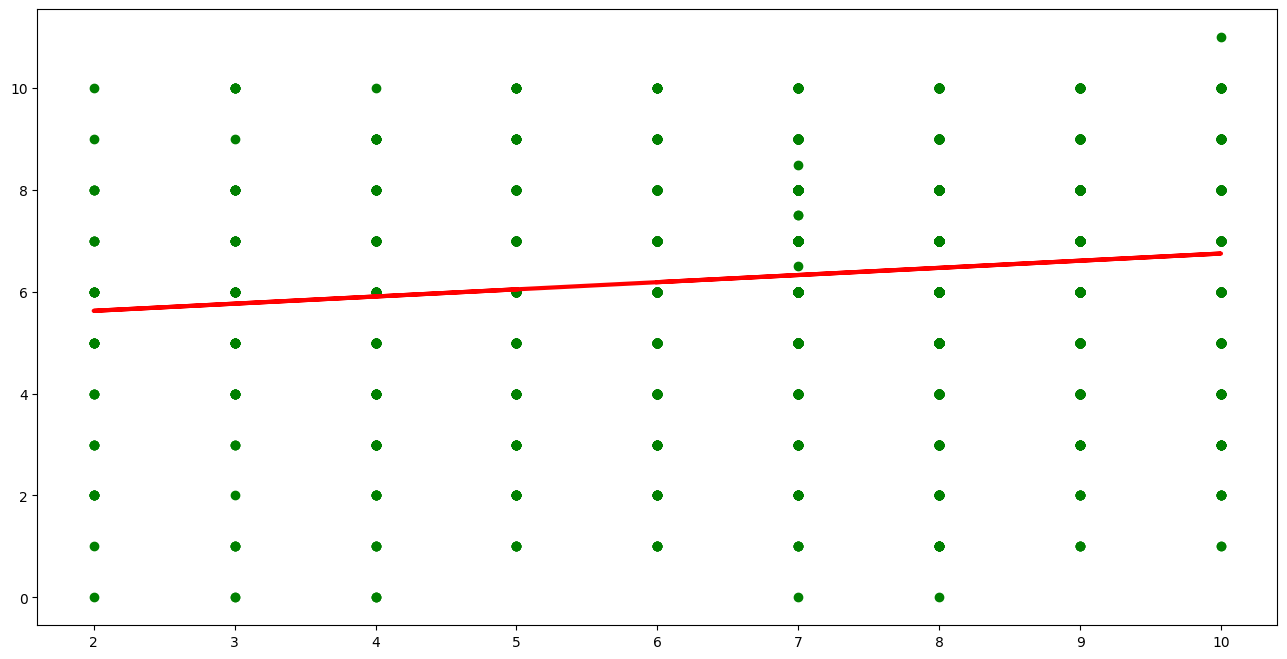

TRAIN SET:
Explained Variance (R^2) 	: 0.016532354584416598
Mean Squared Error (MSE) 	: 3.385680668500125
Root Mean Squared Error （RMSE) 	: 1.8400219206575026
TEST SET:
Explained Variance (R^2) 	: 0.0396996216346559
Mean Squared Error (MSE) 	: 3.2125105163530887
Root Mean Squared Error （RMSE) 	: 1.7923477665768686
Linear Regression between participant's and their partner's perception on his/her: ambitious


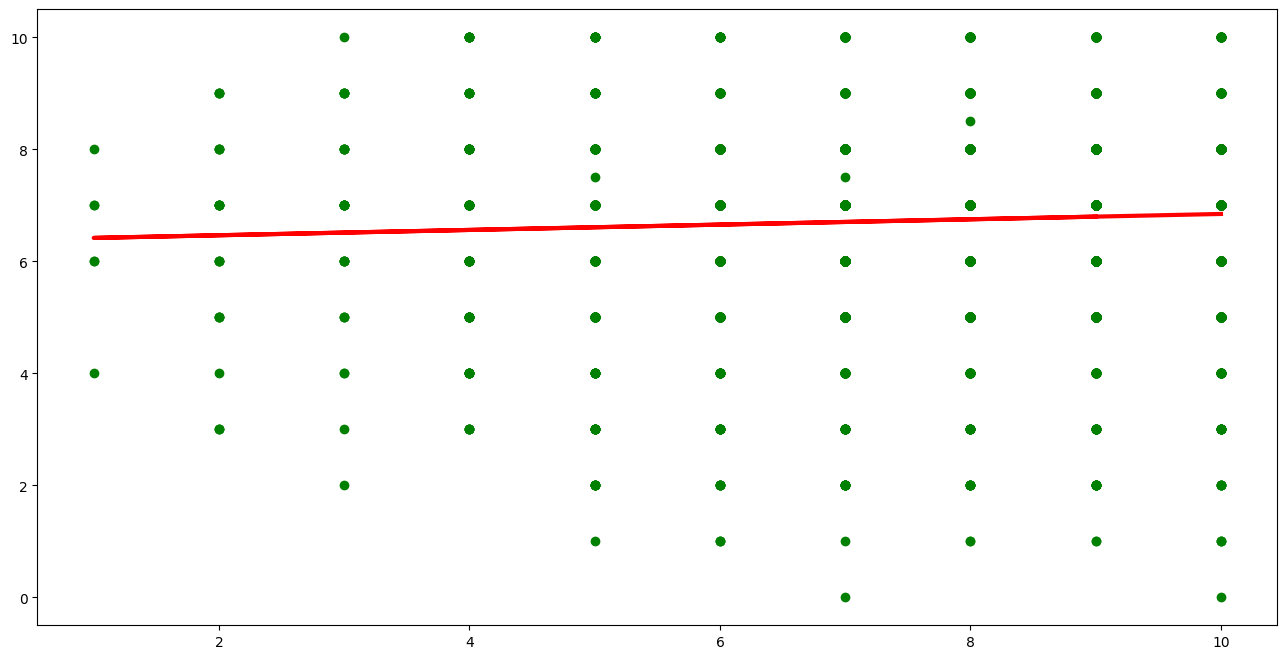

TRAIN SET:
Explained Variance (R^2) 	: 0.002143561432107921
Mean Squared Error (MSE) 	: 3.5730672818154443
Root Mean Squared Error （RMSE) 	: 1.8902558773392146
TEST SET:
Explained Variance (R^2) 	: -0.006782424317645752
Mean Squared Error (MSE) 	: 3.534497490628953
Root Mean Squared Error （RMSE) 	: 1.8800259281799687


In [105]:
# For code reusability, we will create a function that will take in the dataframe and the target variable and return the result of a linear regression model.
def linearTest(dataset_x, dataset_y, test_size):
    linear = LinearRegression()
    x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=test_size)
    linear.fit(x_train, y_train)
    dataset_y_pred = linear.predict(dataset_x)
    y_train_pred = linear.predict(x_train)
    y_test_pred = linear.predict(x_test)
    f = plt.figure(figsize=(16,8))
    plt.scatter(dataset_x, dataset_y, color="green")
    plt.plot(dataset_x, dataset_y_pred, color="red", linewidth="3")
    plt.show()
    print("TRAIN SET:")
    print("Explained Variance (R^2) \t:", linear.score(x_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(x_train, y_train_pred))
    print("Root Mean Squared Error （RMSE) \t:", np.sqrt(mean_squared_error(x_train, y_train_pred)))
    
    print("TEST SET:")
    print("Explained Variance (R^2) \t:", linear.score(x_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(x_test, y_test_pred))
    print("Root Mean Squared Error （RMSE) \t:", np.sqrt(mean_squared_error(x_test, y_test_pred)))
    return linear

# Then, we run for each of the 5 variables (perception of attributes) 

for i in ['attr', 'sinc', 'intel', 'fun', 'amb']:
    print("Linear Regression between participant's and their partner's perception on his/her: " + {"attr": "attractive", "sinc":"sincere", "intel": "intelligence", "fun": "fun", "amb": "ambitious"}[i])
    linearTest(own_perception[i + '5_1'].values.reshape(-1, 1), partner_perception[i + '_o'].values.reshape(-1,1), 0.2) # reshape(-1,1) is used to convert the data into a 2D array


##### From the linear regression results, though our own perceptions of the partner's view generally positively correlate with their actual views, we can see that our own perception is almost always bias with considerable estimating errors.